## 환경 구축


In [6]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [8]:
# Colab Path 설정
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks/package_collection', my_path)
sys.path.insert(0, my_path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
import pandas as pd
import pm4py
import numpy as np
import matplotlib.pyplot as plt
import datetime

plt.rc('font', family='NanumBarunGothic')

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
from pm4py.algo.organizational_mining.roles import algorithm as roles_discovery

In [ ]:
def token_replay(log, net, im, fm):
  from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
  replay_log = token_replay.apply(log, net, im, fm)
  # for i in replay_log:
  #   print(i)  
  fitness = replay_fitness_evaluator.apply(log, net, im, fm, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
  prec = precision_evaluator.apply(log, net, im, fm, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
  gen = generalization_evaluator.apply(log, net, im, fm)
  simp = simplicity_evaluator.apply(net)  
  print("fitness : " + str(fitness) + "\nprecision : " + str(prec) + "\ngeneralization : " + str(gen) + "\nsimplicity : " + str(simp))

## 첼시전체 골 3분 전

In [12]:
football = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/애널리/data/chelsea_event_time.csv')

In [13]:
event_log_pm4py = pm4py.format_dataframe(football, case_id='case:concept:name', activity_key='concept:name',
                                         timestamp_key='time:timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')
event_log_pm4py

,case:concept:name,id_event,sort_order,time,text,concept:name,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,cumgoal,date,result,time:timestamp,@@index
0,15 Arsenal vs Chelsea,EmtzRaCt1,1,0:02:00,Ramires (Chelsea) wins a free kick on the righ...,프리킥시도,NaN,원정팀,Chelsea,Arsenal,ramires,NaN,NaN,NaN,NaN,NaN,0,오른쪽측면,NaN,없음,NaN,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:02:00+00:00,0
1,15 Arsenal vs Chelsea,EmtzRaCt2,2,0:02:00,Foul by Alexis Sanchez (Arsenal).,파울,NaN,홈팀,Arsenal,Chelsea,alexis sanchez,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-04-26 00:00:10+00:00,무,2015-04-26 00:02:10+00:00,1
2,15 Arsenal vs Chelsea,EmtzRaCt3,3,0:02:00,Foul by Branislav Ivanovic (Chelsea).,파울,NaN,원정팀,Chelsea,Arsenal,branislav ivanovic,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-04-26 00:00:20+00:00,무,2015-04-26 00:02:20+00:00,2
3,15 Arsenal vs Chelsea,EmtzRaCt4,4,0:02:00,Alexis Sanchez (Arsenal) wins a free kick in t...,프리킥시도,NaN,홈팀,Arsenal,Chelsea,alexis sanchez,NaN,NaN,NaN,NaN,NaN,0,공격지역,NaN,없음,NaN,0,0,2015-04-26 00:00:30+00:00,무,2015-04-26 00:02:30+00:00,3
4,15 Arsenal vs Chelsea,EmtzRaCt5,5,0:03:00,Foul by Branislav Ivanovic (Chelsea).,파울,NaN,원정팀,Chelsea,Arsenal,branislav ivanovic,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:03:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,16 West Ham vs Chelsea,0WUhYgmP93,93,1:31:00,"Substitution Substitution, West Ham Unite...",교체,NaN,홈팀,West Ham,Chelsea,NaN,NaN,angelo ogbonna,mark noble,NaN,NaN,0,NaN,NaN,없음,NaN,0,2,2015-10-24 00:00:00+00:00,승,2015-10-24 01:31:00+00:00,7248
7249,16 West Ham vs Chelsea,0WUhYgmP94,94,1:32:00,"Offside, Chelsea. John Terry tries a through b...",오프사이드,스루패스실패,원정팀,Chelsea,West Ham,falcao,john terry,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,1,2015-10-24 00:00:00+00:00,패,2015-10-24 01:32:00+00:00,7249
7250,16 West Ham vs Chelsea,0WUhYgmP95,95,1:34:00,Foul by John Obi Mikel (Chelsea).,파울,NaN,원정팀,Chelsea,West Ham,john obi mikel,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,1,2015-10-24 00:00:00+00:00,패,2015-10-24 01:34:00+00:00,7250
7251,16 West Ham vs Chelsea,0WUhYgmP96,96,1:34:00,Dimitri Payet (West Ham United) wins a free ki...,프리킥시도,NaN,홈팀,West Ham,Chelsea,dimitri payet,NaN,NaN,NaN,NaN,NaN,0,왼쪽측면,NaN,없음,NaN,0,2,2015-10-24 00:00:10+00:00,승,2015-10-24 01:34:10+00:00,7251


In [ ]:
def basic_data_analysis(event_log):
    num_events = len(event_log)
    num_cases = len(event_log['case:concept:name'].unique())
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    mean_case_durations = np.round(np.mean(pm4py.stats.get_all_case_durations(event_log))/24/60/60, 2)    
    # print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}".format(num_events, num_cases, start_activities, end_activities))
    print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}\nMean of case durations: {}".format(num_events, num_cases, start_activities, end_activities, mean_case_durations))

In [ ]:
basic_data_analysis(goal_event_log_pm4py)

Number of events: 900
Number of cases: 71
Start activities: {'패널티바깥쪽슈팅시도': 13, '코너킥': 11, '파울': 9, '수비지역프리킥시도': 6, '공격지역프리킥시도': 6, '패널티박스중앙슈팅시도': 6, '오프사이드': 3, '옐로카드': 3, '교체': 3, '우측무각슈팅시도': 2, '우측패널티박스슈팅시도': 2, '좌측패널티박스슈팅시도': 2, '좌측패널티안쪽슈팅시도': 1, '패널티킥위치슈팅시도': 1, '매우가까운슈팅시도': 1, '좌측무각슈팅시도': 1, '우측패널티안쪽슈팅시도': 1}
End activities: {'패널티박스중앙슈팅시도': 27, '매우가까운슈팅시도': 16, '패널티바깥쪽슈팅시도': 7, '패널티킥위치슈팅시도': 5, '우측패널티박스슈팅시도': 4, '좌측패널티박스슈팅시도': 3, '좌측패널티안쪽슈팅시도': 3, '우측패널티안쪽슈팅시도': 2, '기록되지않음슈팅시도': 2, '우측무각슈팅시도': 1, '좌측무각슈팅시도': 1}
Mean of case durations: 0.03


In [ ]:
is_goal_time=event_log_pm4py[event_log_pm4py['is_goal']==1].loc[:,'time:timestamp']
is_goal_time

93     2015-02-07 00:07:00+00:00
127    2015-02-07 00:47:20+00:00
142    2015-02-07 01:05:00+00:00
181    2014-08-18 00:13:00+00:00
183    2014-08-18 00:16:00+00:00
                  ...           
7094   2015-08-23 00:42:00+00:00
7116   2015-08-23 00:59:00+00:00
7172   2015-10-24 00:17:00+00:00
7216   2015-10-24 00:55:10+00:00
7234   2015-10-24 01:18:10+00:00
Name: time:timestamp, Length: 222, dtype: datetime64[ns, UTC]

In [ ]:
is_goal_three_minutes_before_time=is_goal_time-datetime.timedelta(minutes=3)
is_goal_three_minutes_before_time

93     2015-02-07 00:04:00+00:00
127    2015-02-07 00:44:20+00:00
142    2015-02-07 01:02:00+00:00
181    2014-08-18 00:10:00+00:00
183    2014-08-18 00:13:00+00:00
                  ...           
7094   2015-08-23 00:39:00+00:00
7116   2015-08-23 00:56:00+00:00
7172   2015-10-24 00:14:00+00:00
7216   2015-10-24 00:52:10+00:00
7234   2015-10-24 01:15:10+00:00
Name: time:timestamp, Length: 222, dtype: datetime64[ns, UTC]

In [ ]:
goal_event_log=pd.DataFrame()
for i in range(len(is_goal_time)):
  filtered_event_log = pm4py.filter_time_range(event_log_pm4py, is_goal_three_minutes_before_time.iloc[i], is_goal_time.iloc[i], mode = 'events')
  goal_event_log=pd.concat([goal_event_log, filtered_event_log])
goal_event_log.head(10)

,case:concept:name,id_event,sort_order,time,text,concept:name,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,cumgoal,date,result,time:timestamp,@@index
91,15 Aston Villa vs Chelsea,jaCjOrv93,3,0:04:00,Booking Tom Cleverley (Aston Villa) is sh...,옐로카드,NaN,홈팀,Aston Villa,Chelsea,tom cleverley,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:04:00+00:00,91
92,15 Aston Villa vs Chelsea,jaCjOrv94,4,0:06:00,"Offside, Chelsea. Oscar tries a through ball, ...",오프사이드,스루패스실패,원정팀,Chelsea,Aston Villa,didier drogba,oscar,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:00+00:00,승,2015-02-07 00:06:00+00:00,92
93,15 Aston Villa vs Chelsea,jaCjOrv95,5,0:07:00,"Goal! Goal! Aston Villa 0, Chelsea 1. ...",패널티박스중앙슈팅시도,키패스,원정팀,Chelsea,Aston Villa,eden hazard,willian,NaN,NaN,좌측하단,유효슈팅,1,패널티박스중앙,오른발,패스,필드,0,1,2015-02-07 00:00:00+00:00,승,2015-02-07 00:07:00+00:00,93
122,15 Aston Villa vs Chelsea,jaCjOrv934,34,0:44:00,Booking Ashley Westwood (Aston Villa) is ...,옐로카드,NaN,홈팀,Aston Villa,Chelsea,ashley westwood,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:20+00:00,패,2015-02-07 00:44:20+00:00,122
123,15 Aston Villa vs Chelsea,jaCjOrv935,35,0:46:00,Attempt missed. Andreas Weimann (Aston Villa) ...,패널티박스중앙슈팅시도,키패스,홈팀,Aston Villa,Chelsea,andreas weimann,alan hutton,NaN,NaN,홈런,비유효슈팅,0,패널티박스중앙,오른발,크로스,필드,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:46:00+00:00,123
124,15 Aston Villa vs Chelsea,jaCjOrv936,36,0:46:00,Attempt blocked. Eden Hazard (Chelsea) right f...,패널티바깥쪽슈팅시도,키패스,원정팀,Chelsea,Aston Villa,eden hazard,nemanja matic,NaN,NaN,막힘,차단,0,패널티바깥쪽,오른발,패스,필드,0,1,2015-02-07 00:00:10+00:00,승,2015-02-07 00:46:10+00:00,124
125,15 Aston Villa vs Chelsea,jaCjOrv937,37,0:47:00,Attempt blocked. Tom Cleverley (Aston Villa) l...,패널티바깥쪽슈팅시도,키패스,홈팀,Aston Villa,Chelsea,tom cleverley,fabian delph,NaN,NaN,막힘,차단,0,패널티바깥쪽,왼발,패스,필드,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:47:00+00:00,125
126,15 Aston Villa vs Chelsea,jaCjOrv938,38,0:47:00,"Corner, Aston Villa. Conceded by Gary Cahill.",코너킥,NaN,홈팀,Aston Villa,Chelsea,gary cahill,gary cahill,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:10+00:00,패,2015-02-07 00:47:10+00:00,126
127,15 Aston Villa vs Chelsea,jaCjOrv939,39,0:47:00,"Goal! Goal! Aston Villa 1, Chelsea 1. ...",패널티박스중앙슈팅시도,키패스,홈팀,Aston Villa,Chelsea,jores okore,carles gil,NaN,NaN,좌측하단,유효슈팅,1,패널티박스중앙,머리,크로스,코너킥,0,1,2015-02-07 00:00:20+00:00,패,2015-02-07 00:47:20+00:00,127
137,15 Aston Villa vs Chelsea,jaCjOrv949,49,1:02:00,Fabian Delph (Aston Villa) wins a free kick in...,공격지역프리킥시도,NaN,홈팀,Aston Villa,Chelsea,fabian delph,NaN,NaN,NaN,NaN,NaN,0,공격지역,NaN,없음,NaN,0,1,2015-02-07 00:00:00+00:00,패,2015-02-07 01:02:00+00:00,137


In [ ]:
goal_event_log_pm4py = pm4py.format_dataframe(goal_event_log, case_id='case:concept:name', activity_key='concept:name',
                                         timestamp_key='time:timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')

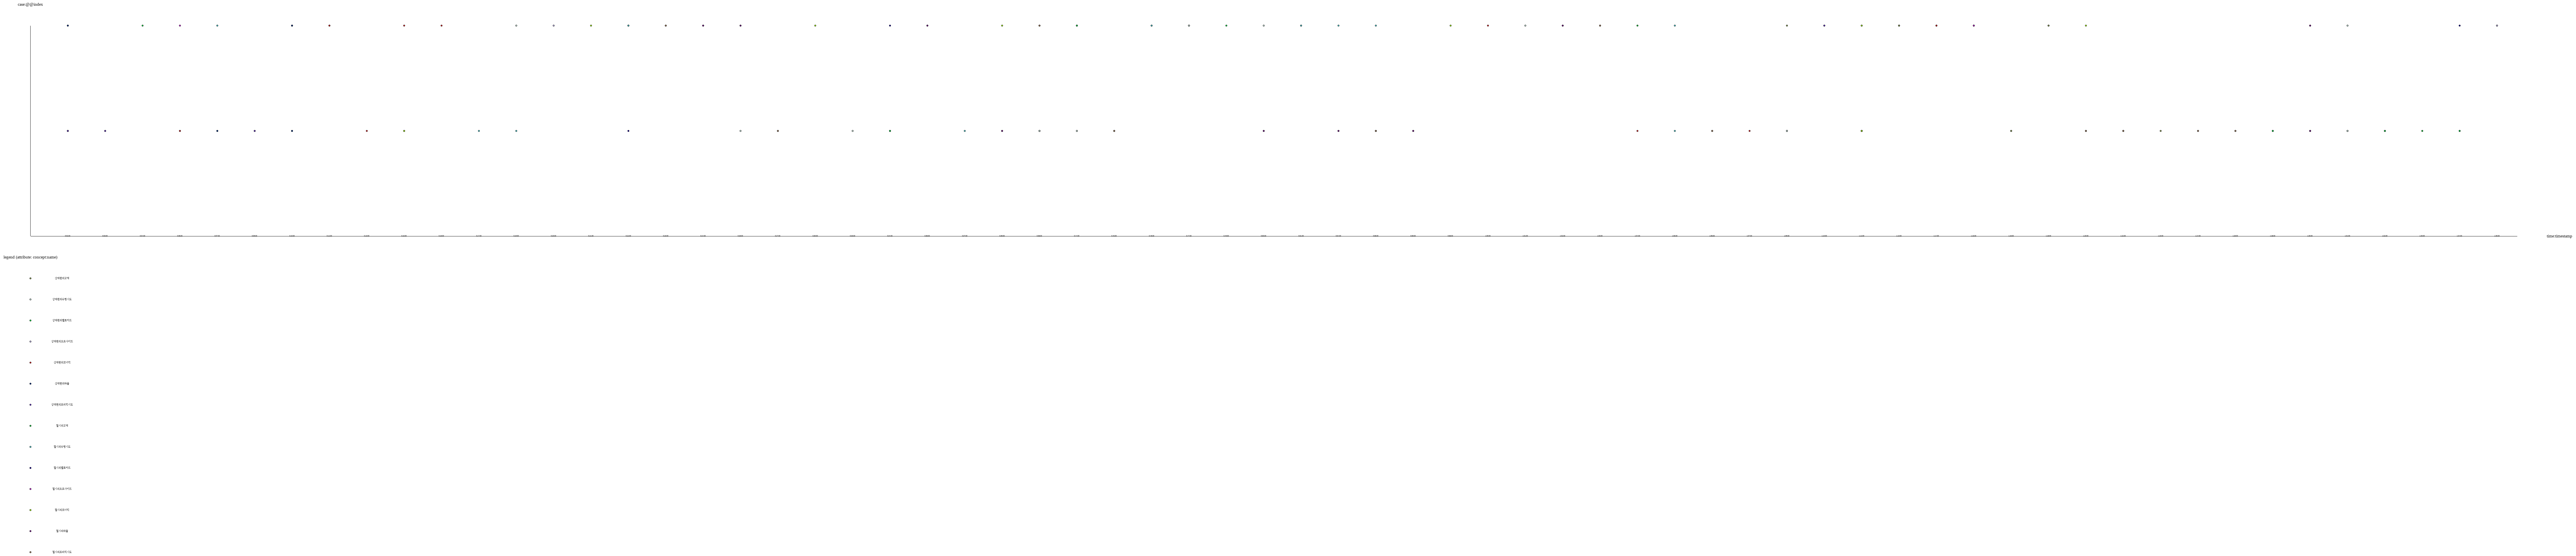

In [ ]:
pm4py.view_dotted_chart(goal_event_log_pm4py)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


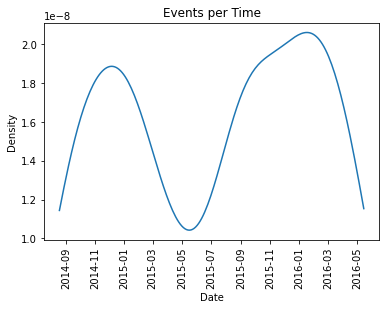

In [ ]:
pm4py.view_events_per_time_graph(goal_event_log_pm4py)

In [ ]:
event_log_pm4py = goal_event_log_pm4py

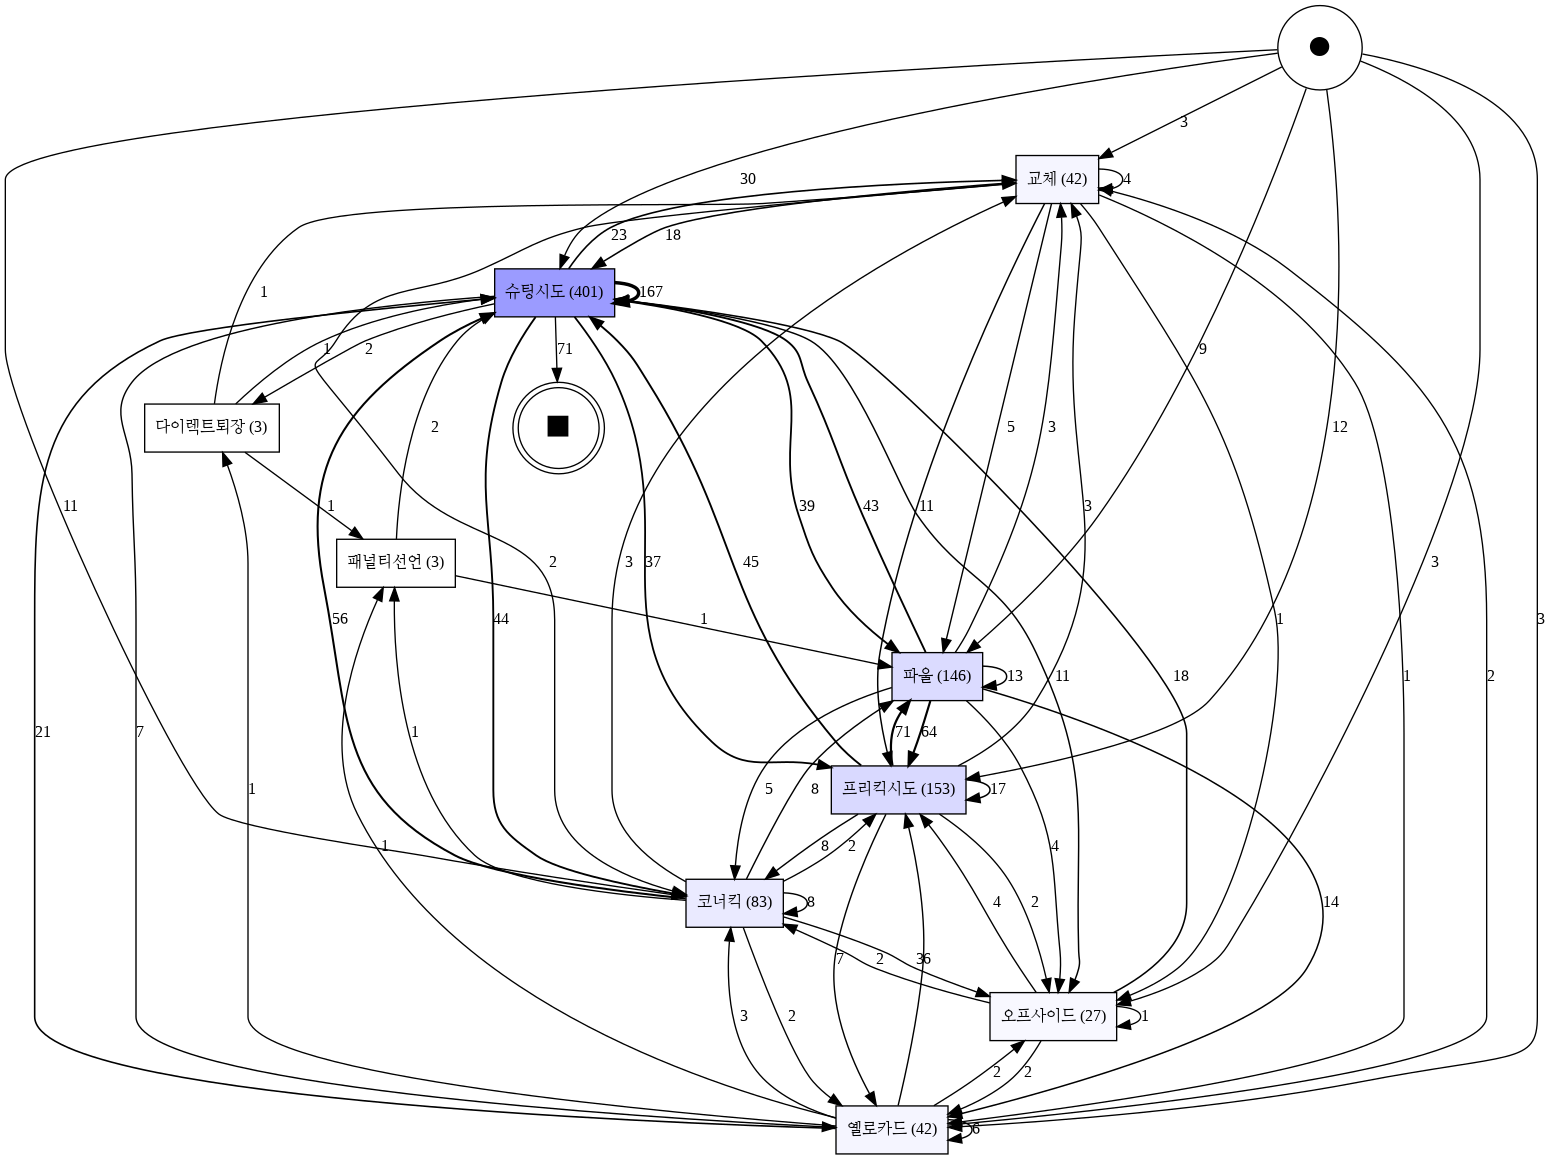

In [ ]:
rel, start, final = pm4py.discover_dfg(event_log_pm4py)
pm4py.view_dfg(rel, start, final)

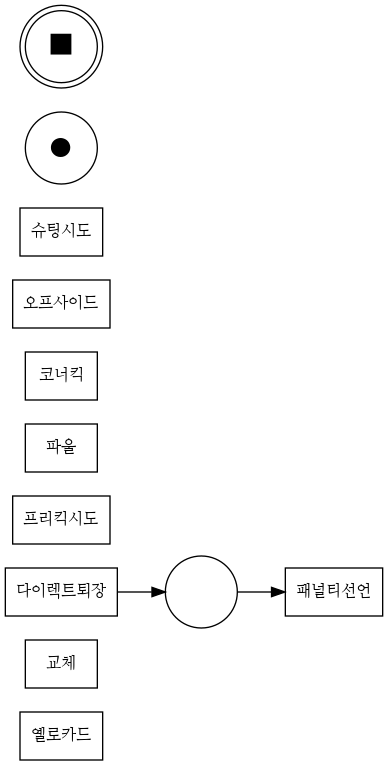

In [ ]:
net, im, fm = pm4py.discover_petri_net_alpha(event_log_pm4py)
pm4py.view_petri_net(net, im, fm)

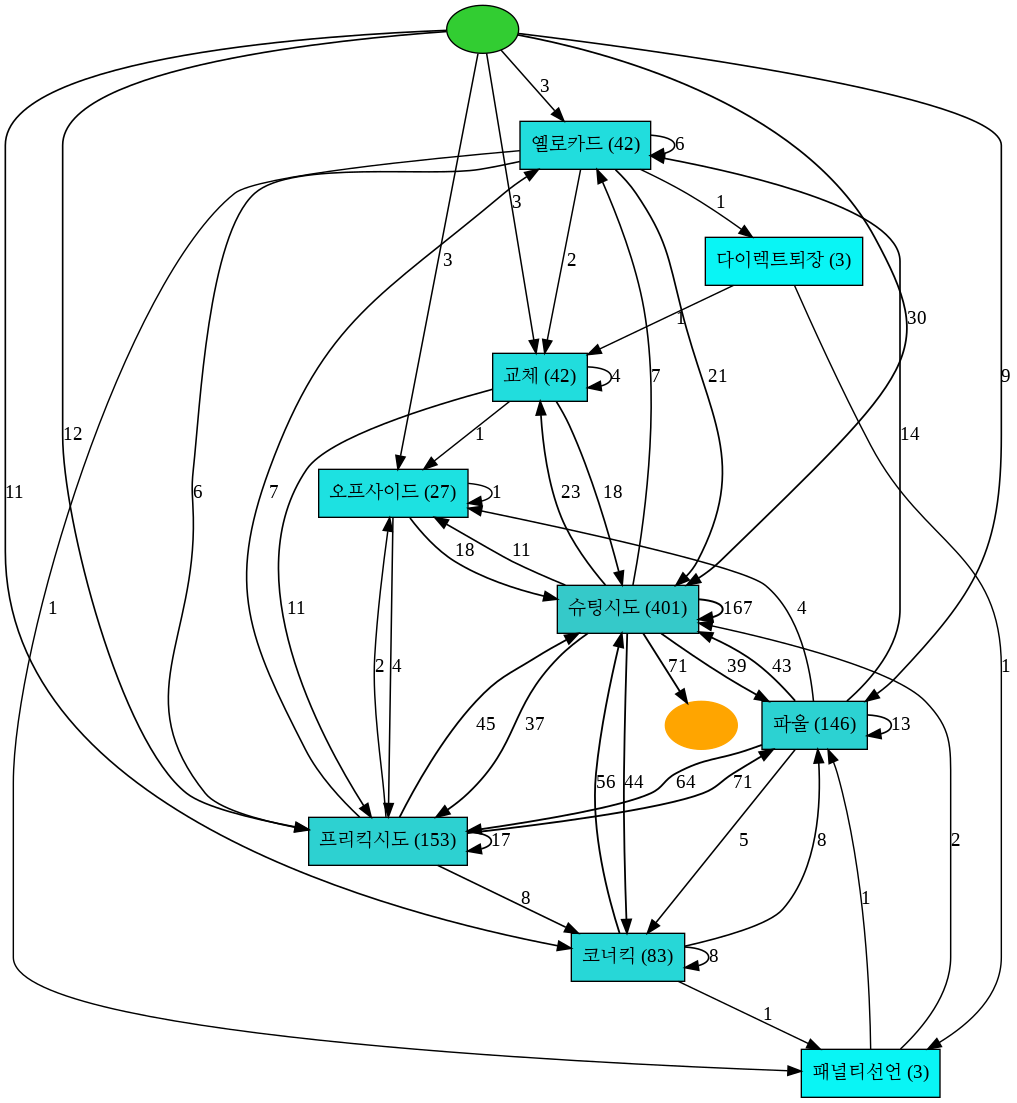

In [ ]:
heu_model = pm4py.discover_heuristics_net(event_log_pm4py)
pm4py.view_heuristics_net(heu_model)

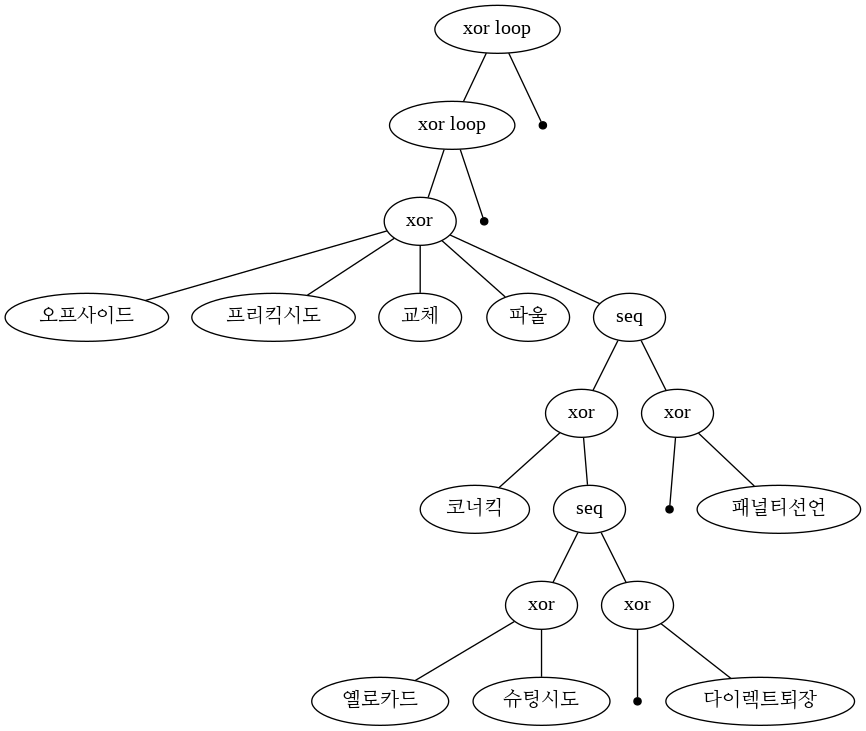

In [ ]:
tree = pm4py.discover_process_tree_inductive(event_log_pm4py)
pm4py.view_process_tree(tree)

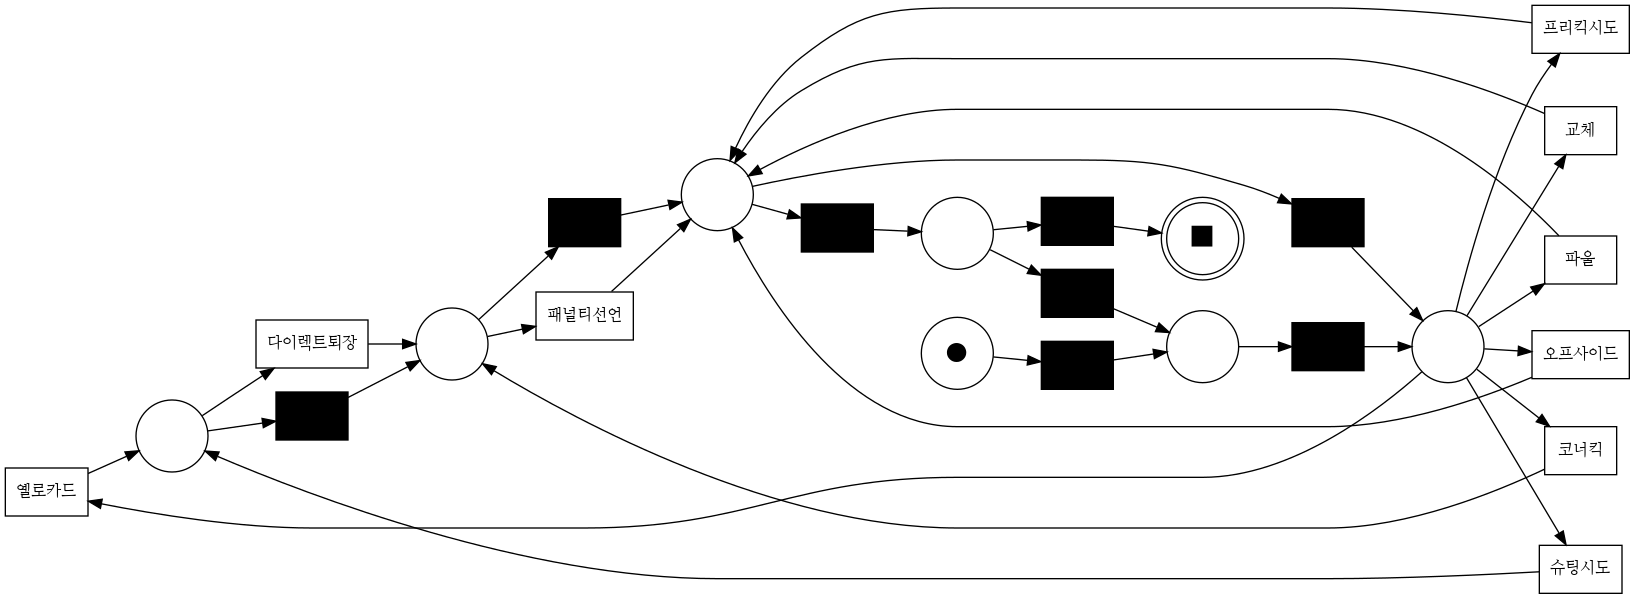

In [ ]:
net2, im2, fm2 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net2, im2, fm2)

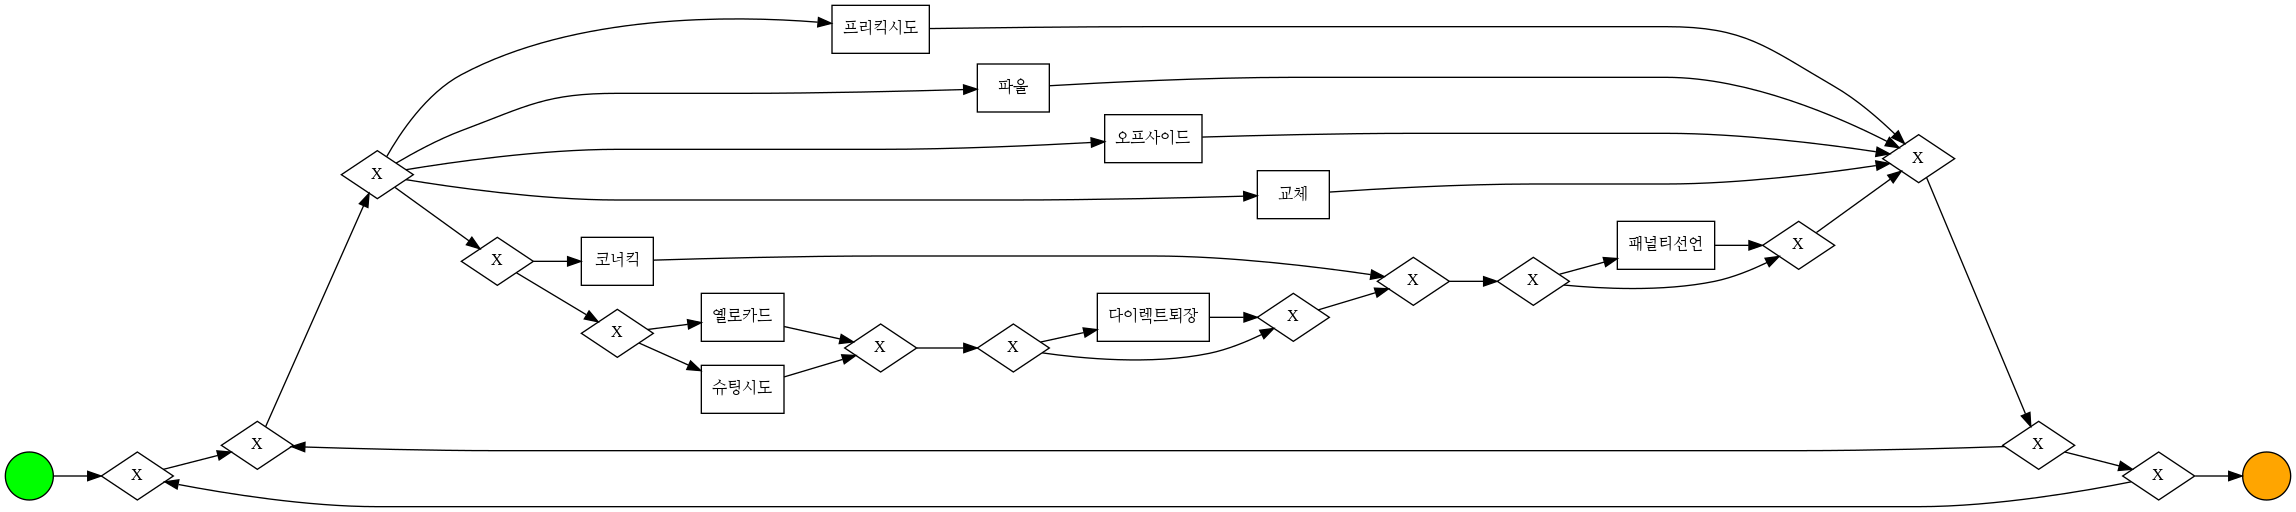

In [ ]:
bpmn_Chelsea_win_goal_filtered = pm4py.discover_bpmn_inductive(goal_event_log_pm4py)
pm4py.view_bpmn(bpmn_Chelsea_win_goal_filtered)

In [ ]:
net, im, fm = alpha_miner.apply(event_log_pm4py)
token_replay(event_log_pm4py, net, im, fm)

In [ ]:
net, im, fm = heuristics_miner.apply(event_log_pm4py, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(event_log_pm4py, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(goal_event_log_pm4py)
token_replay(goal_event_log_pm4py, net, im, fm)

## dfg 필터링 해보기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: get_attribute_values is deprecated as of 2.2.10 and will be removed in 3.0.0. please use get_event_attribute_values instead
  


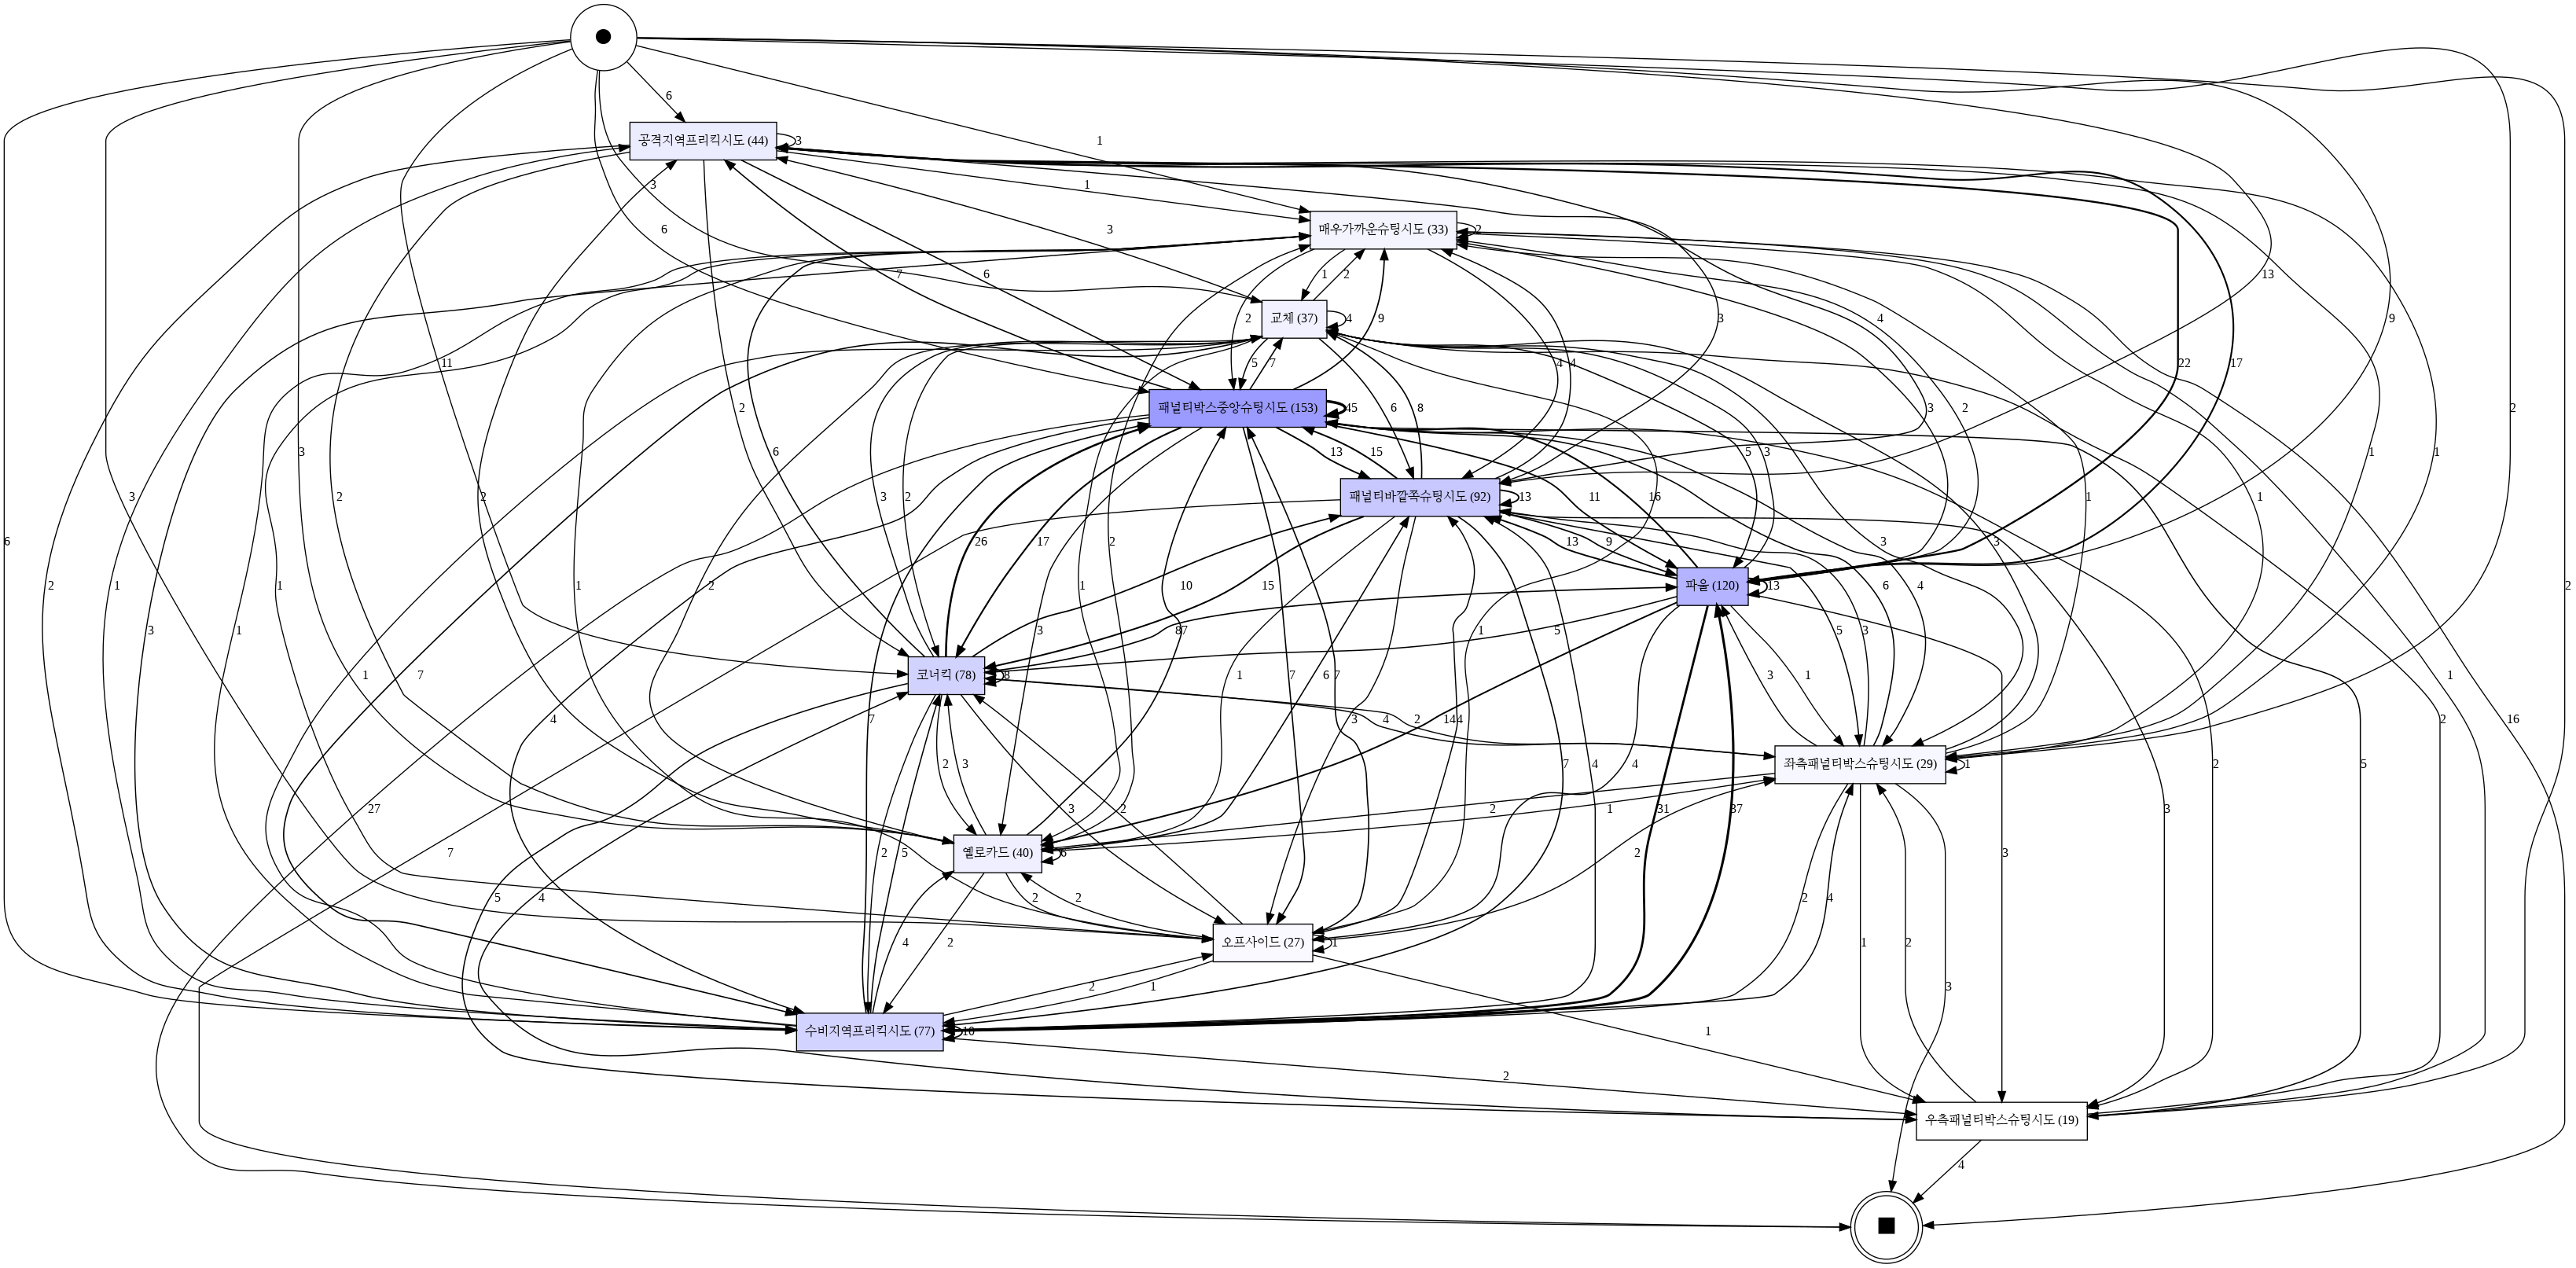

In [ ]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(goal_event_log_pm4py)
activities_count = pm4py.get_attribute_values(goal_event_log_pm4py, "concept:name")
dfg_, sa_, ea_, activities_count_ = dfg_filtering.filter_dfg_on_activities_percentage(dfg, sa, ea, activities_count, 0.5)
pm4py.view_dfg(dfg_, sa_, ea_)

## 15시즌, 16시즌 비교

### 15시즌

In [ ]:
target_string1 = ['15', 'Chelsea']
target_string2 = ['16', 'Chelsea']
Chelsea_filtered_event_log1=goal_event_log_pm4py[goal_event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string1))]
Chelsea_filtered_event_log2=goal_event_log_pm4py[goal_event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string2))]

In [ ]:
Chelsea_filtered_event_log1[Chelsea_filtered_event_log1['case:concept:name'] == '15 Aston Villa vs Chelsea']

,case:concept:name,id_event,sort_order,time,text,concept:name,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,cumgoal,date,result,time:timestamp,@@index
91,15 Aston Villa vs Chelsea,jaCjOrv93,3,0:04:00,Booking Tom Cleverley (Aston Villa) is sh...,옐로카드,NaN,홈팀,Aston Villa,Chelsea,tom cleverley,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:04:00+00:00,91
92,15 Aston Villa vs Chelsea,jaCjOrv94,4,0:06:00,"Offside, Chelsea. Oscar tries a through ball, ...",오프사이드,스루패스실패,원정팀,Chelsea,Aston Villa,didier drogba,oscar,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:00+00:00,승,2015-02-07 00:06:00+00:00,92
93,15 Aston Villa vs Chelsea,jaCjOrv95,5,0:07:00,"Goal! Goal! Aston Villa 0, Chelsea 1. ...",패널티박스중앙슈팅시도,키패스,원정팀,Chelsea,Aston Villa,eden hazard,willian,NaN,NaN,좌측하단,유효슈팅,1,패널티박스중앙,오른발,패스,필드,0,1,2015-02-07 00:00:00+00:00,승,2015-02-07 00:07:00+00:00,93
122,15 Aston Villa vs Chelsea,jaCjOrv934,34,0:44:00,Booking Ashley Westwood (Aston Villa) is ...,옐로카드,NaN,홈팀,Aston Villa,Chelsea,ashley westwood,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:20+00:00,패,2015-02-07 00:44:20+00:00,122
123,15 Aston Villa vs Chelsea,jaCjOrv935,35,0:46:00,Attempt missed. Andreas Weimann (Aston Villa) ...,패널티박스중앙슈팅시도,키패스,홈팀,Aston Villa,Chelsea,andreas weimann,alan hutton,NaN,NaN,홈런,비유효슈팅,0,패널티박스중앙,오른발,크로스,필드,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:46:00+00:00,123
124,15 Aston Villa vs Chelsea,jaCjOrv936,36,0:46:00,Attempt blocked. Eden Hazard (Chelsea) right f...,패널티바깥쪽슈팅시도,키패스,원정팀,Chelsea,Aston Villa,eden hazard,nemanja matic,NaN,NaN,막힘,차단,0,패널티바깥쪽,오른발,패스,필드,0,1,2015-02-07 00:00:10+00:00,승,2015-02-07 00:46:10+00:00,124
125,15 Aston Villa vs Chelsea,jaCjOrv937,37,0:47:00,Attempt blocked. Tom Cleverley (Aston Villa) l...,패널티바깥쪽슈팅시도,키패스,홈팀,Aston Villa,Chelsea,tom cleverley,fabian delph,NaN,NaN,막힘,차단,0,패널티바깥쪽,왼발,패스,필드,0,0,2015-02-07 00:00:00+00:00,패,2015-02-07 00:47:00+00:00,125
126,15 Aston Villa vs Chelsea,jaCjOrv938,38,0:47:00,"Corner, Aston Villa. Conceded by Gary Cahill.",코너킥,NaN,홈팀,Aston Villa,Chelsea,gary cahill,gary cahill,NaN,NaN,NaN,NaN,0,NaN,NaN,없음,NaN,0,0,2015-02-07 00:00:10+00:00,패,2015-02-07 00:47:10+00:00,126
127,15 Aston Villa vs Chelsea,jaCjOrv939,39,0:47:00,"Goal! Goal! Aston Villa 1, Chelsea 1. ...",패널티박스중앙슈팅시도,키패스,홈팀,Aston Villa,Chelsea,jores okore,carles gil,NaN,NaN,좌측하단,유효슈팅,1,패널티박스중앙,머리,크로스,코너킥,0,1,2015-02-07 00:00:20+00:00,패,2015-02-07 00:47:20+00:00,127
137,15 Aston Villa vs Chelsea,jaCjOrv949,49,1:02:00,Fabian Delph (Aston Villa) wins a free kick in...,공격지역프리킥시도,NaN,홈팀,Aston Villa,Chelsea,fabian delph,NaN,NaN,NaN,NaN,NaN,0,공격지역,NaN,없음,NaN,0,1,2015-02-07 00:00:00+00:00,패,2015-02-07 01:02:00+00:00,137


In [ ]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
replay_log = token_replay.apply(Chelsea_filtered_event_log1, net, im, fm)
for i in replay_log:
  print(i) 

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(Chelsea_filtered_event_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.50, 
                                                                              heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 5,
                                                                              heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES : 5,
                                                                              # heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.2,
                                                                              # heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 3
                                                                              })

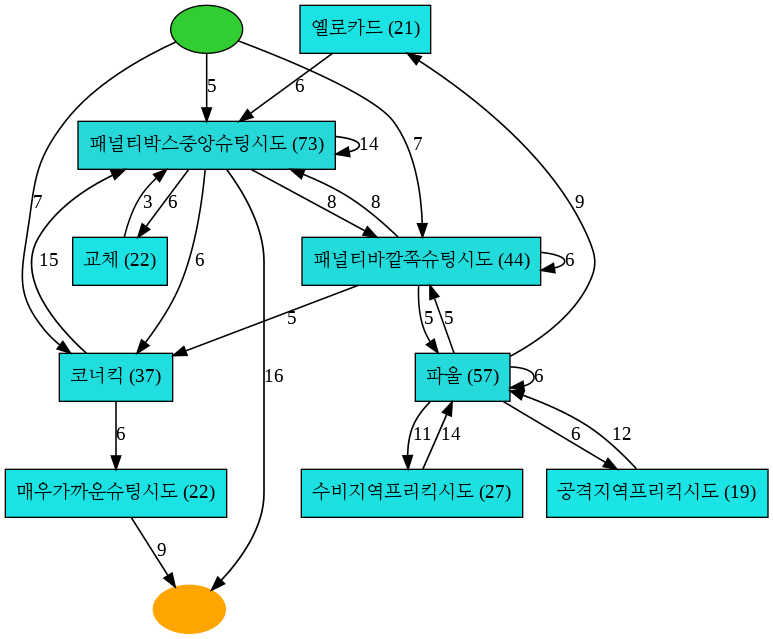

In [ ]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

In [ ]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

tree = inductive_miner.apply_tree(Chelsea_filtered_event_log1)

gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

In [ ]:
from pm4py.objects.conversion.dfg import converter as dfg_mining
net, im, fm = dfg_mining.apply(dfg_)
pm4py.view_petri_net(net, im, fm)

/usr/local/lib/python3.7/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: get_attribute_values is deprecated as of 2.2.10 and will be removed in 3.0.0. please use get_event_attribute_values instead
  


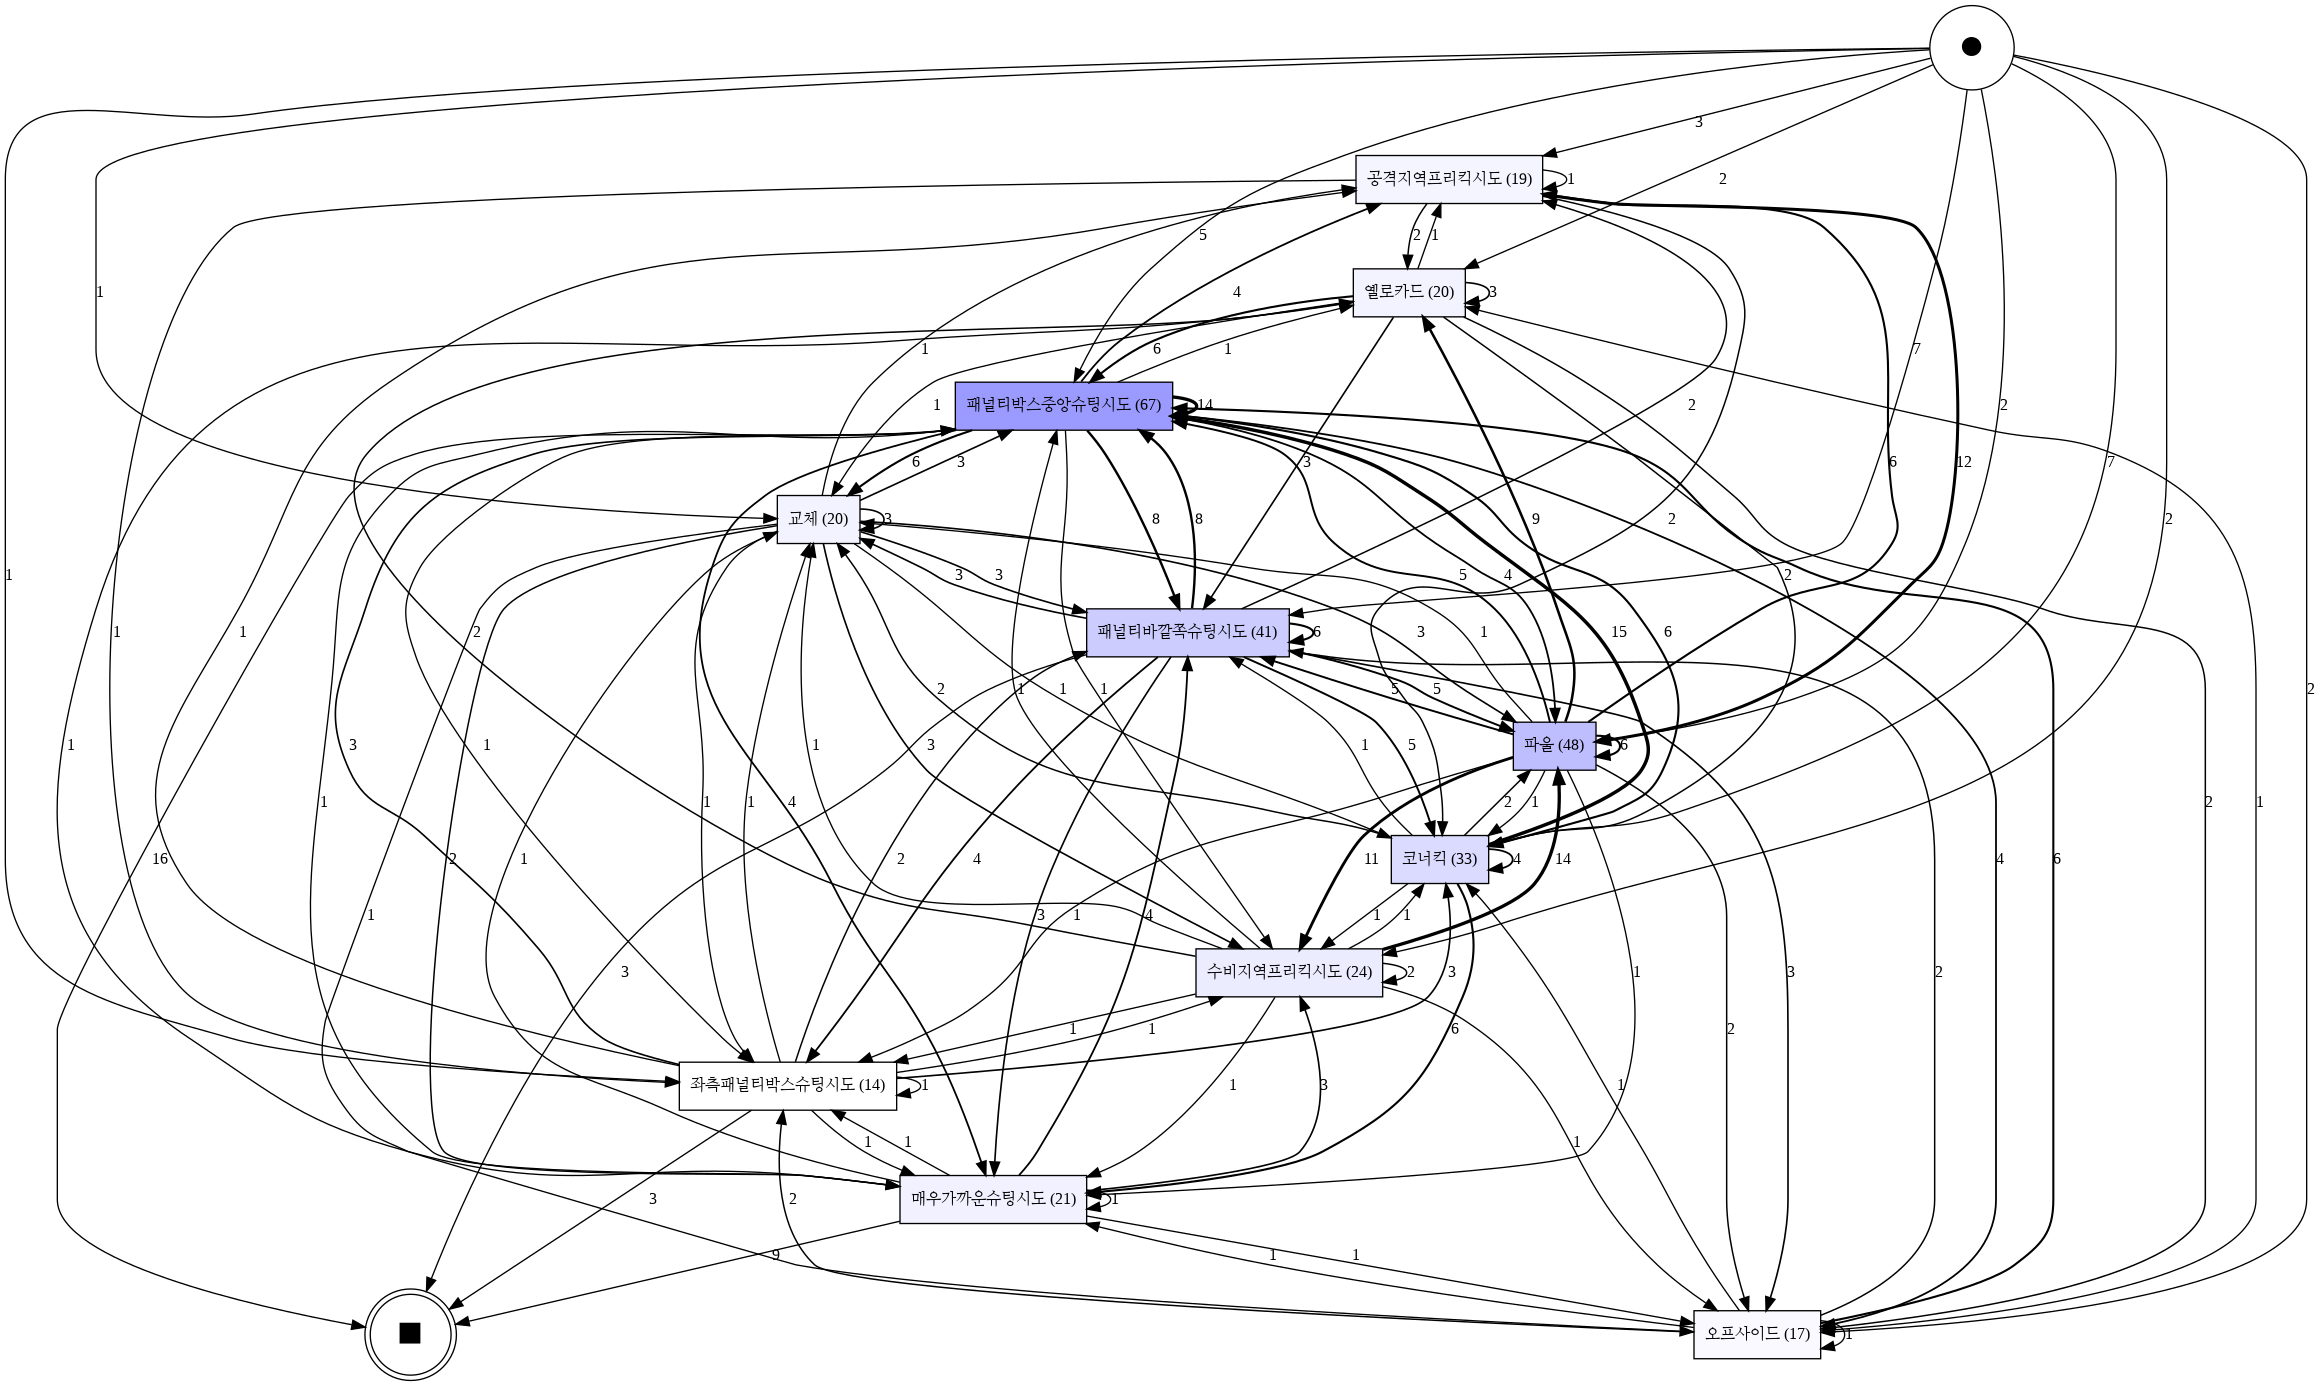

In [ ]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(Chelsea_filtered_event_log1)
activities_count = pm4py.get_attribute_values(Chelsea_filtered_event_log1, "concept:name")
dfg_, sa_, ea_, activities_count_ = dfg_filtering.filter_dfg_on_activities_percentage(dfg, sa, ea, activities_count, 0.5)
pm4py.view_dfg(dfg_, sa_, ea_)

In [ ]:
net, im, fm = alpha_miner.apply(Chelsea_filtered_event_log1)
token_replay(Chelsea_filtered_event_log1, net, im, fm)

In [ ]:
net, im, fm = heuristics_miner.apply(Chelsea_filtered_event_log1, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(Chelsea_filtered_event_log1, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(Chelsea_filtered_event_log1)
token_replay(Chelsea_filtered_event_log1, net, im, fm)

### 16시즌

In [ ]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(Chelsea_filtered_event_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH : 0.50, 
                                                                              heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_ACT_COUNT : 5,
                                                                              heuristics_miner.Variants.CLASSIC.value.Parameters.MIN_DFG_OCCURRENCES : 5,
                                                                              # heuristics_miner.Variants.CLASSIC.value.Parameters.DFG_PRE_CLEANING_NOISE_THRESH : 0.2,
                                                                              # heuristics_miner.Variants.CLASSIC.value.Parameters.LOOP_LENGTH_TWO_THRESH : 3
                                                                              })

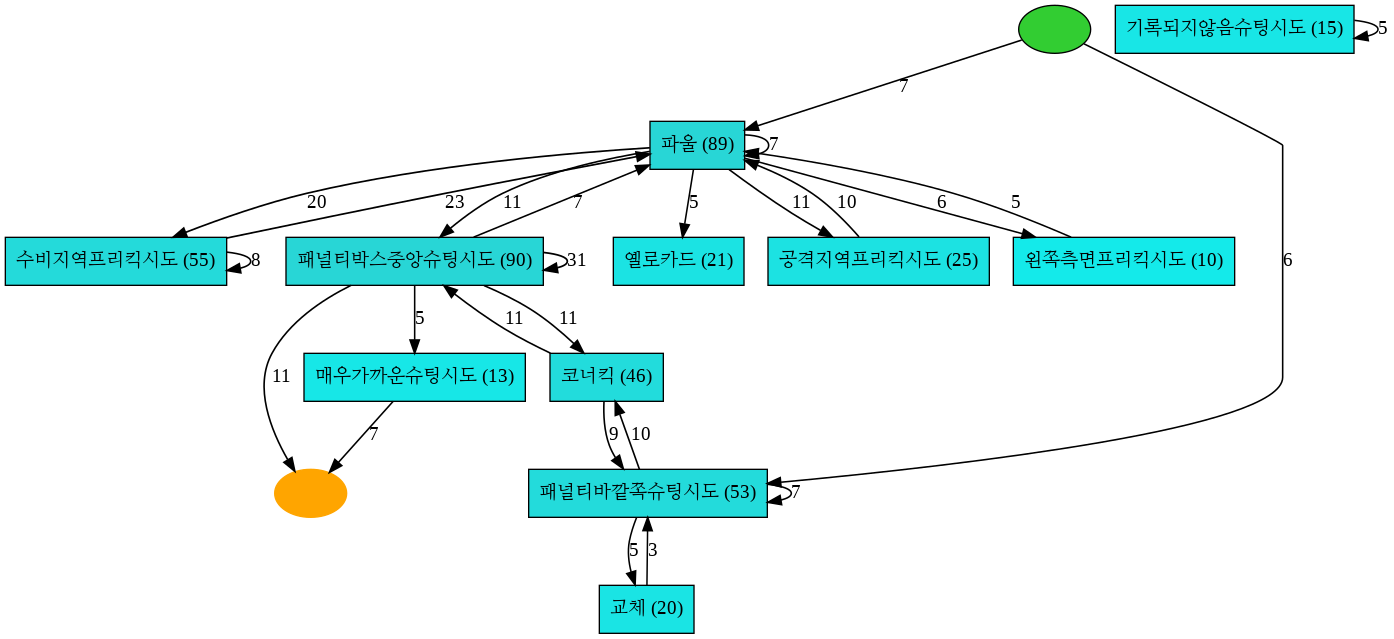

In [ ]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

/usr/local/lib/python3.7/dist-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[start_timestamp_key] = df[timestamp_key]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecatedWarning: get_attribute_values is deprecated as of 2.2.10 and will be removed in 3.0.0. please use get_event_attribute_values instead
  


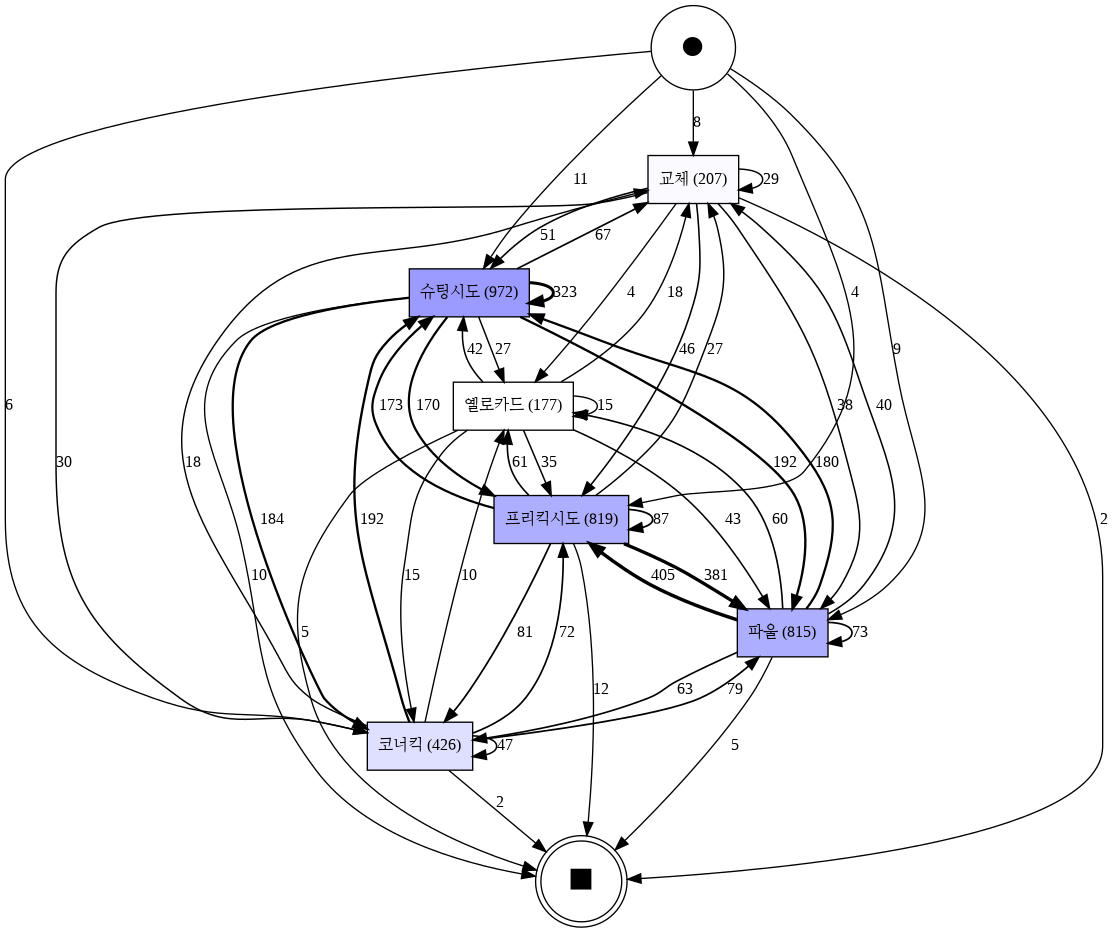

In [ ]:
dfg, sa, ea = pm4py.discover_directly_follows_graph(Chelsea_filtered_event_log2)
activities_count = pm4py.get_attribute_values(Chelsea_filtered_event_log2, "concept:name")
dfg_, sa_, ea_, activities_count_ = dfg_filtering.filter_dfg_on_activities_percentage(dfg, sa, ea, activities_count, 0.5)
pm4py.view_dfg(dfg_, sa_, ea_)

In [ ]:
net, im, fm = alpha_miner.apply(Chelsea_filtered_event_log2)
token_replay(Chelsea_filtered_event_log2, net, im, fm)

In [ ]:
net, im, fm = heuristics_miner.apply(Chelsea_filtered_event_log2, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
token_replay(Chelsea_filtered_event_log2, net, im, fm)

In [ ]:
net, im, fm = inductive_miner.apply(Chelsea_filtered_event_log2)
token_replay(Chelsea_filtered_event_log2, net, im, fm)

## 15시즌 슈팅시도 소셜 네트워크 분석

In [14]:
target_string1 = ['15', 'Chelsea']
target_string2 = ['16', 'Chelsea']
Chelsea_filtered_event_log1=event_log_pm4py[event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string1))]
Chelsea_filtered_event_log2=event_log_pm4py[event_log_pm4py['case:concept:name'].map(lambda x: all(string in x for string in target_string2))]

In [15]:
social_net_15 = Chelsea_filtered_event_log1[(Chelsea_filtered_event_log1['concept:name']=='슈팅시도') & (Chelsea_filtered_event_log1['event_type2']=='키패스')]

In [16]:
social_net_15 = social_net_15.rename(columns={'player': 'org:resource'})

In [17]:
social_net_15 = social_net_15[social_net_15['event_team']== 'Chelsea']
social_net_15

,case:concept:name,id_event,sort_order,time,text,concept:name,event_type2,side,event_team,opponent,org:resource,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,cumgoal,date,result,time:timestamp,@@index
15,15 Arsenal vs Chelsea,EmtzRaCt16,16,0:15:00,Attempt blocked. Oscar (Chelsea) right footed ...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,oscar,cesc fabregas,NaN,NaN,막힘,차단,0,패널티박스중앙,오른발,스루패스,필드,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:15:00+00:00,15
17,15 Arsenal vs Chelsea,EmtzRaCt18,18,0:17:00,Attempt missed. Gary Cahill (Chelsea) header f...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,gary cahill,cesc fabregas,NaN,NaN,크게빗나감,비유효슈팅,0,패널티박스중앙,머리,크로스,코너킥,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:17:00+00:00,17
18,15 Arsenal vs Chelsea,EmtzRaCt19,19,0:18:00,Attempt blocked. Cesc Fabregas (Chelsea) right...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,cesc fabregas,willian,NaN,NaN,막힘,차단,0,패널티바깥쪽,오른발,패스,필드,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:18:00+00:00,18
27,15 Arsenal vs Chelsea,EmtzRaCt28,28,0:37:00,Attempt saved. Ramires (Chelsea) right footed ...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,ramires,willian,NaN,NaN,정면,유효슈팅,0,패널티박스중앙,오른발,스루패스,필드,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:37:00+00:00,27
42,15 Arsenal vs Chelsea,EmtzRaCt43,43,0:56:00,Attempt missed. Eden Hazard (Chelsea) right fo...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,eden hazard,cesar azpilicueta,NaN,NaN,크게빗나감,비유효슈팅,0,패널티바깥쪽,오른발,패스,필드,0,0,2015-04-26 00:00:00+00:00,무,2015-04-26 00:56:00+00:00,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,15 West Ham vs Chelsea,phdntxHi56,56,0:58:00,Attempt saved. Ramires (Chelsea) header from v...,슈팅시도,키패스,원정팀,Chelsea,West Ham,ramires,eden hazard,NaN,NaN,정면,유효슈팅,0,매우가까운,머리,크로스,필드,0,1,2015-03-04 00:00:00+00:00,승,2015-03-04 00:58:00+00:00,3432
3439,15 West Ham vs Chelsea,phdntxHi63,63,1:09:00,Attempt blocked. Eden Hazard (Chelsea) right f...,슈팅시도,키패스,원정팀,Chelsea,West Ham,eden hazard,diego costa,NaN,NaN,막힘,차단,0,패널티박스중앙,오른발,패스,필드,0,1,2015-03-04 00:00:00+00:00,승,2015-03-04 01:09:00+00:00,3439
3455,15 West Ham vs Chelsea,phdntxHi79,79,1:24:00,Attempt missed. Diego Costa (Chelsea) left foo...,슈팅시도,키패스,원정팀,Chelsea,West Ham,diego costa,willian,NaN,NaN,우측으로빗나감,비유효슈팅,0,좌측패널티박스,왼발,헤딩,필드,0,1,2015-03-04 00:00:00+00:00,승,2015-03-04 01:24:00+00:00,3455
3457,15 West Ham vs Chelsea,phdntxHi81,81,1:25:00,Attempt blocked. Branislav Ivanovic (Chelsea) ...,슈팅시도,키패스,원정팀,Chelsea,West Ham,branislav ivanovic,diego costa,NaN,NaN,막힘,차단,0,패널티바깥쪽,오른발,패스,필드,0,1,2015-03-04 00:00:00+00:00,승,2015-03-04 01:25:00+00:00,3457


In [18]:
num = 0
new_df = pd.DataFrame(columns=social_net_15.columns)
for index, row in social_net_15.iterrows():
  row['case:concept:name'] = index
  row2 = row.copy()
  row2['concept:name'] = row['event_type2']
  row2['org:resource'] = row['player2']
  for i in range(2):
    if i == 0:
      new_df.loc[num] = row2
    else:
      new_df.loc[num] = row
    num += 1

In [ ]:
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df, variant=sna.Variants.HANDOVER_LOG)

In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks/애널리'

/content/drive/MyDrive/Colab Notebooks/애널리


In [ ]:
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.view(temp_file_name=gviz_hw_py)/
sna_visualizer.save(
    gviz_hw_py, dest_file='15시즌슈팅시도.html', notebook=True
)


### 15시즌 승리 소셜 네트워크

In [ ]:
new_df_win = new_df[new_df['result'] == '승']
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df_win, variant=sna.Variants.HANDOVER_LOG)
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.save(
    gviz_hw_py, dest_file='15시즌슈팅시도_승리.html'
)


### 15시즌 골 넣은것 소셜 네트워크

In [26]:
new_df_goal = new_df[new_df['is_goal'] == 1]

In [ ]:
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df_goal, variant=sna.Variants.HANDOVER_LOG)
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.save(
    gviz_hw_py, dest_file='15시즌슈팅시도_골.html'
)


## 16시즌 슈팅시도 소셜 네트워크 분석

In [19]:
social_net_16 = Chelsea_filtered_event_log2[(Chelsea_filtered_event_log2['concept:name']=='슈팅시도') & (Chelsea_filtered_event_log2['event_type2']=='키패스')]

In [20]:
social_net_16 = social_net_16.rename(columns={'player': 'org:resource'})

In [21]:
social_net_16 = social_net_16[social_net_16['event_team']== 'Chelsea']
social_net_16

,case:concept:name,id_event,sort_order,time,text,concept:name,event_type2,side,event_team,opponent,org:resource,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,cumgoal,date,result,time:timestamp,@@index
3495,16 Arsenal vs Chelsea,CzWGi6z625,25,0:24:00,"Goal! Arsenal 0, Chelsea 1. Diego Costa (Chel...",슈팅시도,키패스,원정팀,Chelsea,Arsenal,diego costa,branislav ivanovic,NaN,NaN,우측하단,유효슈팅,1,매우가까운,오른발,크로스,필드,0,1,2016-01-24 00:00:10+00:00,승,2016-01-24 00:24:10+00:00,3495
3501,16 Arsenal vs Chelsea,CzWGi6z631,31,0:34:00,Attempt blocked. Cesc Fabregas (Chelsea) right...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,cesc fabregas,cesar azpilicueta,NaN,NaN,막힘,차단,0,우측패널티박스,오른발,패스,필드,0,1,2016-01-24 00:00:10+00:00,승,2016-01-24 00:34:10+00:00,3501
3507,16 Arsenal vs Chelsea,CzWGi6z637,37,0:42:00,Attempt saved. Diego Costa (Chelsea) right foo...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,diego costa,willian,NaN,NaN,정면,유효슈팅,0,우측무각,오른발,패스,필드,0,1,2016-01-24 00:00:00+00:00,승,2016-01-24 00:42:00+00:00,3507
3510,16 Arsenal vs Chelsea,CzWGi6z640,40,0:43:00,Attempt blocked. Branislav Ivanovic (Chelsea) ...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,branislav ivanovic,willian,NaN,NaN,막힘,차단,0,패널티박스중앙,머리,크로스,필드,0,1,2016-01-24 00:00:10+00:00,승,2016-01-24 00:43:10+00:00,3510
3527,16 Arsenal vs Chelsea,CzWGi6z657,57,0:55:00,Attempt blocked. Nemanja Matic (Chelsea) heade...,슈팅시도,키패스,원정팀,Chelsea,Arsenal,nemanja matic,cesc fabregas,NaN,NaN,막힘,차단,0,패널티박스중앙,머리,크로스,필드,0,1,2016-01-24 00:00:00+00:00,승,2016-01-24 00:55:00+00:00,3527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,16 West Ham vs Chelsea,0WUhYgmP25,25,0:25:00,Attempt missed. Ramires (Chelsea) right footed...,슈팅시도,키패스,원정팀,Chelsea,West Ham,ramires,willian,NaN,NaN,홈런,비유효슈팅,0,패널티바깥쪽,오른발,패스,필드,0,0,2015-10-24 00:00:00+00:00,패,2015-10-24 00:25:00+00:00,7180
7188,16 West Ham vs Chelsea,0WUhYgmP33,33,0:34:00,Attempt blocked. Kurt Zouma (Chelsea) header f...,슈팅시도,키패스,원정팀,Chelsea,West Ham,kurt zouma,cesc fabregas,NaN,NaN,막힘,차단,0,패널티박스중앙,머리,크로스,필드,0,0,2015-10-24 00:00:10+00:00,패,2015-10-24 00:34:10+00:00,7188
7216,16 West Ham vs Chelsea,0WUhYgmP61,61,0:55:00,"Goal! Goal! West Ham United 1, Chelsea...",슈팅시도,키패스,원정팀,Chelsea,West Ham,gary cahill,willian,NaN,NaN,우측하단,유효슈팅,1,패널티박스중앙,오른발,크로스,코너킥,0,1,2015-10-24 00:00:10+00:00,패,2015-10-24 00:55:10+00:00,7216
7232,16 West Ham vs Chelsea,0WUhYgmP77,77,1:17:00,Attempt saved. Ramires (Chelsea) left footed s...,슈팅시도,키패스,원정팀,Chelsea,West Ham,ramires,eden hazard,NaN,NaN,우측하단,유효슈팅,0,패널티박스중앙,왼발,패스,필드,0,1,2015-10-24 00:00:10+00:00,패,2015-10-24 01:17:10+00:00,7232


In [22]:
num = 0
new_df2 = pd.DataFrame(columns=social_net_16.columns)
for index, row in social_net_16.iterrows():
  row['case:concept:name'] = index
  row2 = row.copy()
  row2['concept:name'] = row['event_type2']
  row2['org:resource'] = row['player2']
  for i in range(2):
    if i == 0:
      new_df2.loc[num] = row2
    else:
      new_df2.loc[num] = row
    num += 1

In [ ]:
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df2, variant=sna.Variants.HANDOVER_LOG)

In [ ]:
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.save(
    gviz_hw_py, dest_file='16시즌슈팅시도.html'
)

### 16시즌 승리 소셜 네트워크

In [ ]:
new_df_win2 = new_df2[new_df2['result'] == '패']
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df_win2, variant=sna.Variants.HANDOVER_LOG)
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.save(
    gviz_hw_py, dest_file='16시즌슈팅시도_승리.html'
)


### 16시즌 골 넣은것 소셜 네트워크

In [27]:
new_df_goal2 = new_df2[new_df2['is_goal'] == 1]

In [ ]:
from pm4py.algo.organizational_mining.sna import algorithm as sna
hw_values = sna.apply(new_df_goal2, variant=sna.Variants.HANDOVER_LOG)
from pm4py.visualization.sna import visualizer as sna_visualizer
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.PYVIS)
sna_visualizer.save(
    gviz_hw_py, dest_file='16시즌슈팅시도_골.html'
)


## role도출하기

In [24]:
roles = roles_discovery.apply(new_df)
print(roles[0][0], sorted(roles[0][1].items(), key=lambda x: x[1], reverse=True))
print(roles[1][0], sorted(roles[1][1].items(), key=lambda x: x[1], reverse=True))
d_all = pd.DataFrame(roles[0][1].items(), columns=['선수', '횟수']).sort_values('횟수', ascending=False)
d2_all = pd.DataFrame(roles[1][1].items(), columns=['선수', '횟수']).sort_values('횟수', ascending=False)
d_all.reset_index(drop=True)
d2_all.reset_index(drop=True)

['슈팅시도'] [('diego costa', 63), ('eden hazard', 63), ('oscar', 56), ('willian', 44), ('branislav ivanovic', 38), ('cesc fabregas', 35), ('loic remy', 28), ('didier drogba', 24), ('nemanja matic', 21), ('gary cahill', 20), ('john terry', 18), ('andre schurrle', 17), ('ramires', 14), ('cesar azpilicueta', 6), ('juan cuadrado', 6), ('filipe luis', 3), ('john obi mikel', 3), ('kurt zouma', 1), ('mohamed salah', 1), ('ruben loftuscheek', 1)]
['키패스'] [('eden hazard', 98), ('cesc fabregas', 88), ('willian', 49), ('diego costa', 43), ('oscar', 36), ('branislav ivanovic', 34), ('nemanja matic', 24), ('cesar azpilicueta', 17), ('didier drogba', 14), ('filipe luis', 10), ('ramires', 10), ('john terry', 7), ('juan cuadrado', 6), ('andre schurrle', 5), ('gary cahill', 5), ('loic remy', 5), ('francesc fabregas', 3), ('thibaut courtois', 3), ('john obi mikel', 2), ('kurt zouma', 1), ('mohamed salah', 1), ('ruben loftuscheek', 1)]


,선수,횟수
0,eden hazard,98
1,cesc fabregas,88
2,willian,49
3,diego costa,43
4,oscar,36
5,branislav ivanovic,34
6,nemanja matic,24
7,cesar azpilicueta,17
8,didier drogba,14
9,filipe luis,10


In [28]:
roles = roles_discovery.apply(new_df_goal)
print(roles[0][0], sorted(roles[0][1].items(), key=lambda x: x[1], reverse=True))
print(roles[1][0], sorted(roles[1][1].items(), key=lambda x: x[1], reverse=True))
d = pd.DataFrame(roles[0][1].items(), columns=['선수', '횟수2']).sort_values('횟수2', ascending=False)
d2 = pd.DataFrame(roles[1][1].items(), columns=['선수', '횟수2']).sort_values('횟수2', ascending=False)
d.reset_index(drop=True)
d2.reset_index(drop=True)
# pd.concat([d,d2],axis=1, join='outer')
# pd.merge(d, d2, how='outer')

['슈팅시도'] [('diego costa', 15), ('eden hazard', 10), ('loic remy', 7), ('john terry', 5), ('branislav ivanovic', 4), ('didier drogba', 4), ('oscar', 4), ('andre schurrle', 3), ('cesc fabregas', 3), ('ramires', 2), ('gary cahill', 1), ('nemanja matic', 1)]
['키패스'] [('cesc fabregas', 16), ('eden hazard', 9), ('oscar', 8), ('branislav ivanovic', 5), ('ramires', 4), ('cesar azpilicueta', 3), ('diego costa', 3), ('nemanja matic', 3), ('willian', 3), ('francesc fabregas', 2), ('didier drogba', 1), ('gary cahill', 1), ('john obi mikel', 1)]


,선수,횟수2
0,cesc fabregas,16
1,eden hazard,9
2,oscar,8
3,branislav ivanovic,5
4,ramires,4
5,cesar azpilicueta,3
6,diego costa,3
7,nemanja matic,3
8,willian,3
9,francesc fabregas,2


Text(0.5, 1.0, '15시즌 첼시 슈팅시도 횟수')

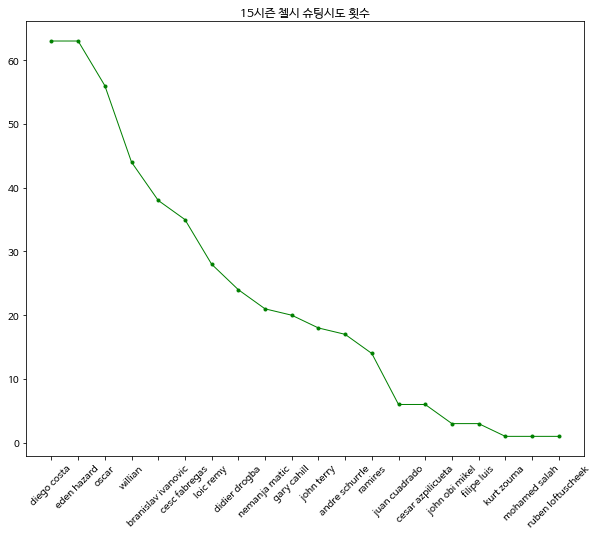

In [48]:
xs=d.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=d_all['횟수'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation = 45)
plt.plot(d_all['선수'], ys_open, 'o-', ms=3, lw=1, color='green') #xy데이터 플롯-line
plt.title("15시즌 첼시 슈팅시도 횟수")
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')

Text(0.5, 1.0, '15시즌 첼시 골 횟수')

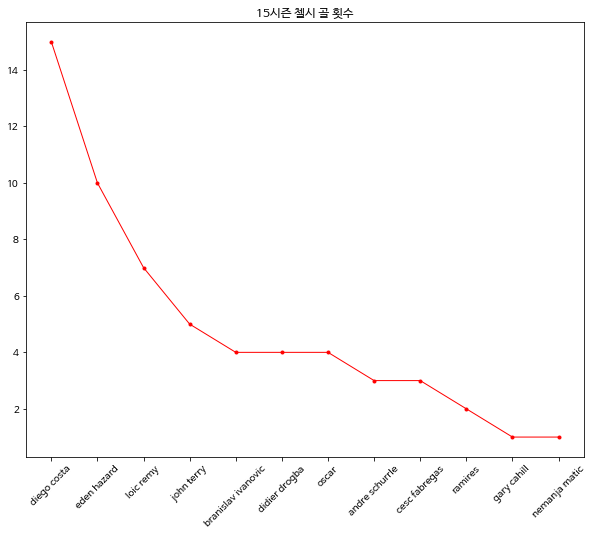

In [50]:
xs=d.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=d['횟수2'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation = 45)
plt.plot(d['선수'], ys_open, 'o-', ms=3, lw=1, color='red') #xy데이터 플롯-line
plt.title("15시즌 첼시 골 횟수")
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')

In [29]:
goal_15 = pd.merge(d_all, d)
goal_15['골 비율'] = goal_15['횟수2']/ goal_15['횟수']
goal_15 = goal_15.sort_values('골 비율', ascending=False)

Text(0.5, 1.0, '15시즌 첼시 슈팅시도 중 골의 비율')

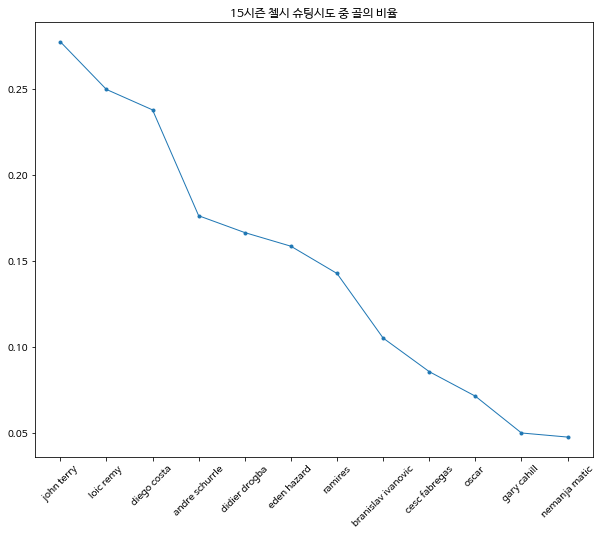

In [59]:
xs=goal_15.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=goal_15['골 비율'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation = 45)
plt.plot(goal_15['선수'], ys_open, 'o-', ms=3, lw=1, label='open') #xy데이터 플롯-line
plt.title("15시즌 첼시 슈팅시도 중 골의 비율")
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')

In [31]:
roles = roles_discovery.apply(new_df2)
print(roles[0][0], sorted(roles[0][1].items(), key=lambda x: x[1], reverse=True))
print(roles[1][0], sorted(roles[1][1].items(), key=lambda x: x[1], reverse=True))
d_all_2 = pd.DataFrame(roles[0][1].items(), columns=['선수', '횟수']).sort_values('횟수', ascending=False)
d2_all_2 = pd.DataFrame(roles[1][1].items(), columns=['선수', '횟수']).sort_values('횟수', ascending=False)
d_all_2.reset_index(drop=True)
d2_all_2.reset_index(drop=True)

['슈팅시도'] [('diego costa', 58), ('pedro', 45), ('oscar', 38), ('willian', 37), ('eden hazard', 35), ('cesc fabregas', 33), ('nemanja matic', 26), ('branislav ivanovic', 21), ('bertrand traore', 15), ('kurt zouma', 14), ('loic remy', 13), ('kenedy', 12), ('gary cahill', 10), ('john terry', 10), ('falcao', 8), ('ruben loftuscheek', 8), ('cesar azpilicueta', 7), ('ramires', 7), ('baba rahman', 6), ('john obi mikel', 4), ('alexandre pato', 2), ('tammy abraham', 2), ('juan cuadrado', 1), ('ngolo kante', 1), ('victor moses', 1)]
['키패스'] [('willian', 84), ('cesc fabregas', 68), ('eden hazard', 65), ('pedro', 42), ('oscar', 32), ('diego costa', 31), ('cesar azpilicueta', 22), ('nemanja matic', 19), ('branislav ivanovic', 14), ('john obi mikel', 6), ('kenedy', 6), ('bertrand traore', 5), ('loic remy', 4), ('ruben loftuscheek', 4), ('baba rahman', 3), ('gary cahill', 3), ('john terry', 3), ('falcao', 2), ('ramires', 1)]


,선수,횟수
0,willian,84
1,cesc fabregas,68
2,eden hazard,65
3,pedro,42
4,oscar,32
5,diego costa,31
6,cesar azpilicueta,22
7,nemanja matic,19
8,branislav ivanovic,14
9,kenedy,6


In [32]:
from pm4py.algo.organizational_mining.roles import algorithm as roles_discovery
roles = roles_discovery.apply(new_df_goal2)
print(roles[0][0], sorted(roles[0][1].items(), key=lambda x: x[1], reverse=True))
print(roles[1][0], sorted(roles[1][1].items(), key=lambda x: x[1], reverse=True))
d_2 = pd.DataFrame(roles[0][1].items(), columns=['선수', '횟수2']).sort_values('횟수2', ascending=False)
d2_2 = pd.DataFrame(roles[1][1].items(), columns=['선수', '횟수2']).sort_values('횟수2', ascending=False)
d_2.reset_index(drop=True)
d2_2.reset_index(drop=True)

['슈팅시도'] [('diego costa', 8), ('eden hazard', 5), ('pedro', 4), ('willian', 3), ('bertrand traore', 2), ('branislav ivanovic', 2), ('cesar azpilicueta', 2), ('cesc fabregas', 2), ('gary cahill', 2), ('nemanja matic', 2), ('falcao', 1), ('john terry', 1), ('kenedy', 1), ('kurt zouma', 1), ('loic remy', 1), ('oscar', 1), ('ramires', 1), ('ruben loftuscheek', 1)]
['키패스'] [('cesc fabregas', 7), ('willian', 7), ('diego costa', 6), ('cesar azpilicueta', 3), ('eden hazard', 3), ('oscar', 3), ('branislav ivanovic', 2), ('nemanja matic', 2), ('pedro', 2), ('baba rahman', 1), ('bertrand traore', 1), ('gary cahill', 1), ('john obi mikel', 1), ('loic remy', 1)]


,선수,횟수2
0,cesc fabregas,7
1,willian,7
2,diego costa,6
3,cesar azpilicueta,3
4,eden hazard,3
5,oscar,3
6,branislav ivanovic,2
7,nemanja matic,2
8,pedro,2
9,baba rahman,1


Text(0.5, 1.0, '16시즌 첼시 슈팅시도 횟수')

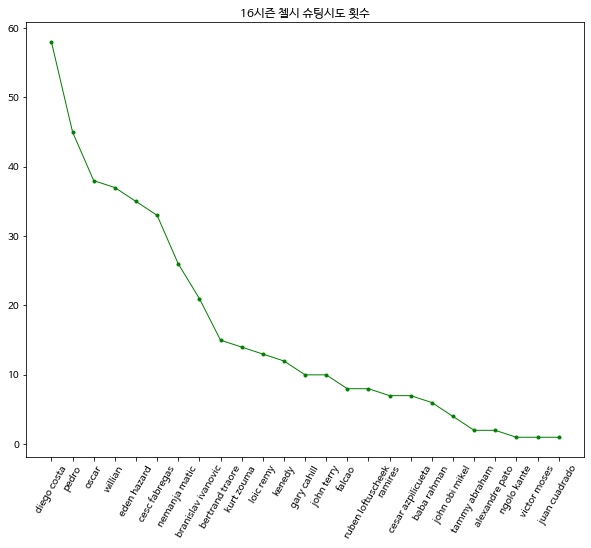

In [55]:
import matplotlib.pyplot as plt

# xs=d_all_2.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=d_all_2['횟수'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation =60)
plt.plot(d_all_2['선수'], ys_open, 'o-', ms=3, lw=1, color='green') #xy데이터 플롯-line
plt.title("16시즌 첼시 슈팅시도 횟수")
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')

Text(0.5, 1.0, '16시즌 첼시 골 횟수')

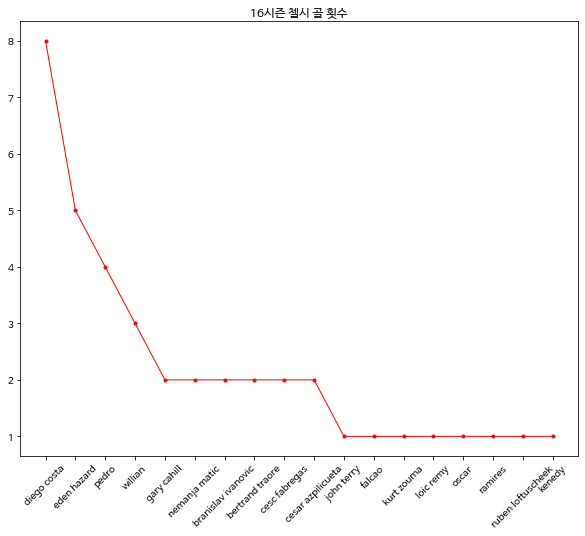

In [57]:
# xs=d.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=d_2['횟수2'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation = 45)
plt.plot(d_2['선수'], ys_open, 'o-', ms=3, lw=1, color='red') #xy데이터 플롯-line
plt.title("16시즌 첼시 골 횟수")
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')

In [33]:
goal_16 = pd.merge(d_all_2, d_2)
goal_16['골 비율'] = goal_16['횟수2']/ goal_16['횟수']
goal_16 = goal_16.sort_values('골 비율', ascending=False)

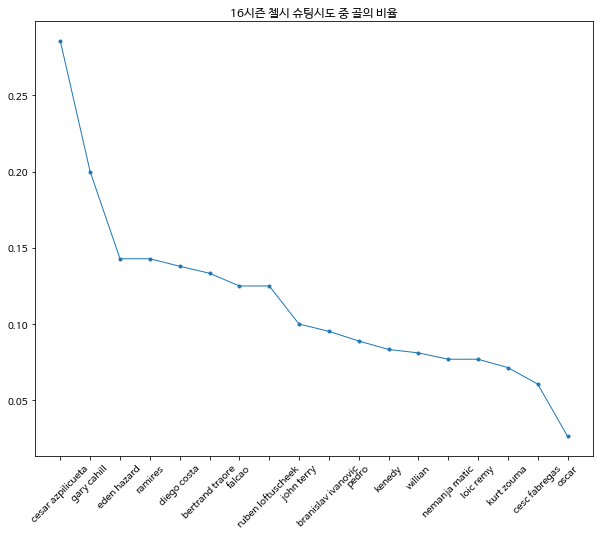

In [60]:
xs=goal_16.index.to_list() #플롯할 데이터 모두 list로 저장
ys_open=goal_16['골 비율'].to_list()
# ys_close=d_2['횟수'].to_list() 
# ys_volume=df_day['volume'].to_list()
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정
# plt.subplot(2,1,1) #2행 1열에서 1번째 그래프 지정
plt.xticks(rotation = 45)
plt.title("16시즌 첼시 슈팅시도 중 골의 비율")
plt.plot(goal_16['선수'], ys_open, 'o-', ms=3, lw=1, label='open') #xy데이터 플롯-line
# plt.plot(d_2['선수'], ys_close, 'o-', ms=3, lw=1, label='close')